In [4]:
import pandas as pd
import matplotlib as mlt
import seaborn as sns


In [3]:
import os
os.getcwd()

'd:\\SalesAnalysis'

In [47]:
customer=pd.read_csv('./RawData/Customer.csv')
order=pd.read_csv('./RawData/Order.csv')
shipping=pd.read_json('./RawData/Shipping.json')

In [11]:
## looking at the sample data of the datasets
customer.head()


,Customer_ID,First,Last,Age,Country
0,1,Joseph,Rice,43,USA
1,2,Gary,Moore,71,USA
2,3,John,Walker,44,UK
3,4,Eric,Carter,38,UK
4,5,William,Jackson,58,UAE


In [14]:
## identifying the number of rows and columns
print(customer.shape)
print(order.shape)
print(shipping.shape)

(250, 5)
(250, 4)
(250, 3)


In [42]:
###check for duplicates customer table
duplicated_count=customer.duplicated().sum()
if duplicated_count>0:

    print(f" there are {duplicated_count} found in the customer table")
else:
    print("no duplicates found in the customer table")



no duplicates found in the customer table


In [41]:
## chceking the duplicates in shipping table

duplicated_count=shipping.duplicated().sum()
if duplicated_count>0:

    print(f" there are {duplicated_count} found in the shipping table")
else:
    print("no duplicates found in the shipping table")

no duplicates found in the shipping table


In [44]:
## checking orders table
duplicated_count=order.duplicated().sum()
if duplicated_count>0:

    print(f" there are {duplicated_count} found in the order table")
else:
    print("no duplicates found in the order table")


no duplicates found in the order table


In [51]:
print(customer.columns)
print(order.columns)
print(shipping.columns)

Index(['Customer_ID', 'First', 'Last', 'Age', 'Country'], dtype='object')
Index(['Order_ID', 'Item', 'Amount', 'Customer_ID'], dtype='object')
 Index(['Shipping_ID', 'Status', 'Customer_ID'], dtype='object')


In [54]:

## rename the column names in all the tables , making it as lowercase 

customer.rename(columns={'Customer_ID':'customer_id','First':'first_name','Last':'last_name','Age':'age','Country':'country'}, inplace=True)
order.rename(columns={'order_id':'order_id','Item':'item','Amount':'sale_amount','Customer_ID':'customer_id'}, inplace=True)
shipping.rename(columns={'Shipping_ID':'shipping_id','Status':'status','Customer_ID':'customer_id'},inplace=True)


## addition of new column full name using first_name and last_name in customer table
customer['full_name']=customer['first_name']+' '+customer['last_name']


In [55]:
print(customer.columns)
print(order.columns)
print(shipping.columns)

Index(['customer_id', 'first_name', 'last_name', 'age', 'country',
       'full_name'],
      dtype='object')
Index(['Order_ID', 'item', 'sale_amount', 'customer_id'], dtype='object')
Index(['shipping_id', 'status', 'customer_id'], dtype='object')


In [80]:

## an argument for a function
dict_table={'customer':customer,'order':order,'shipping':shipping}

def check_null(df_dict):
    for key,df in df_dict.items():
        if df.isnull().sum().sum():
            
            print(f"{key} table contain null values, please validate the file again")
            print("below is the list of records where it has null values")
            print (df[df.isnull().any(axis=1)])
        else:
            
            print(f"{key} table don't have any null values")

check_null(dict_table)



customer table don't have any null values
order table don't have any null values
shipping table don't have any null values


In [81]:
## checking the data for order table

order['sale_amount']

0        400
1        300
2      12000
3        400
4        250
       ...  
245     5000
246      350
247      200
248     1500
249      900
Name: sale_amount, Length: 250, dtype: int64

<Axes: xlabel='item', ylabel='sale_amount'>

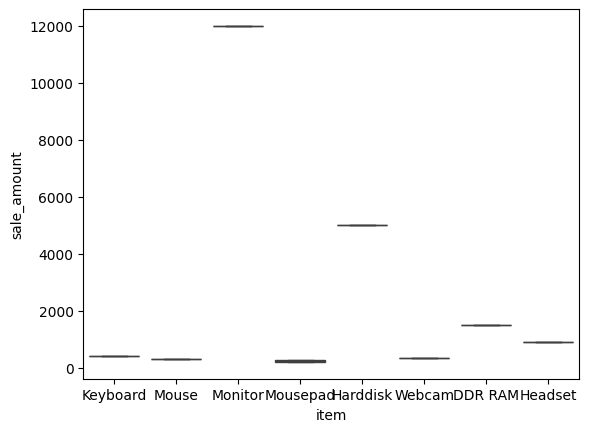

In [87]:
## detecting outliers only order data has numerical column tha's sales amount

order.describe()
sns.boxplot(x=order['item'],y=order['sale_amount'])

## we dont see any outliers in data

<Axes: xlabel='sale_amount'>

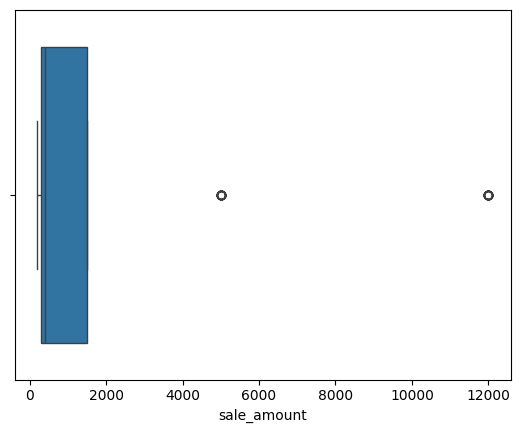

In [88]:
sns.boxplot(x=order['sale_amount'])